In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

from aquaponics import Aquaponics
imode = 6

In [3]:
a = Aquaponics('hydroplant', 'hydronitrogen', N0=0, kswitch=100)
m = a.get_model()

tf = 45
steps = tf * 10 + 1
m.time = np.linspace(0,tf,steps)

a.dNadd.STATUS = 1
a.T.STATUS = 1
a.I.STATUS = 1

p = np.zeros(steps)
p[-1] = 1
final = m.Param(value=p)

m.Obj(-a.w * final + a.Nadd * final)
m.options.MAX_ITER = 500

a.solve(glamdring=True, imode=imode, disp=True, solver=1)

apmonitor 192.168.17.25_687682622 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 0.8.2
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :           24
   Intermediates:            8
   Connections  :            0
   Equations    :           16
   Residuals    :            8
 
 Number of state variables:          13950
 Number of total equations: -        12600
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :           1350
 
 ----------------------------------------------
 Dynamic Control with APOPT Solver
 ----------------------------------------------
 Unknown option: linear_solver
 
 Iter    Objective  Convergence
    0  1.16570E+10  1.00000E+00
    1  6.43090E+47  9.59531E-01
    2  

TypeError: list indices must be integers or slices, not str

In [ ]:
%matplotlib inline
plt.figure(figsize=(12,9))
ax = plt.subplot(311)
plt.plot(m.time, a.w, label='Dry Weight')
plt.grid()
plt.legend()

plt.subplot(312, sharex=ax)
plt.plot(m.time, a.dNup, label='dNup')
plt.plot(m.time, a.dNadd, label='dNadd')
plt.grid()
plt.legend()

plt.subplot(313, sharex=ax)
plt.plot(m.time, a.cN, label='cN')
plt.grid()
plt.legend()


plt.xlim(0, tf)
plt.xlabel('Time (days)')

In [4]:
dNadd = a.dNadd

In [5]:
a = Aquaponics('hydroplant', 'hydronitrogen', N0=0, kswitch=10)
m = a.get_model()

m.time = np.linspace(0,tf,steps)
a.dNadd.value = list(dNadd.value)

a.solve(glamdring=True, imode=7, disp=False, solver=3)

Text(0.5,0,'Time (days)')

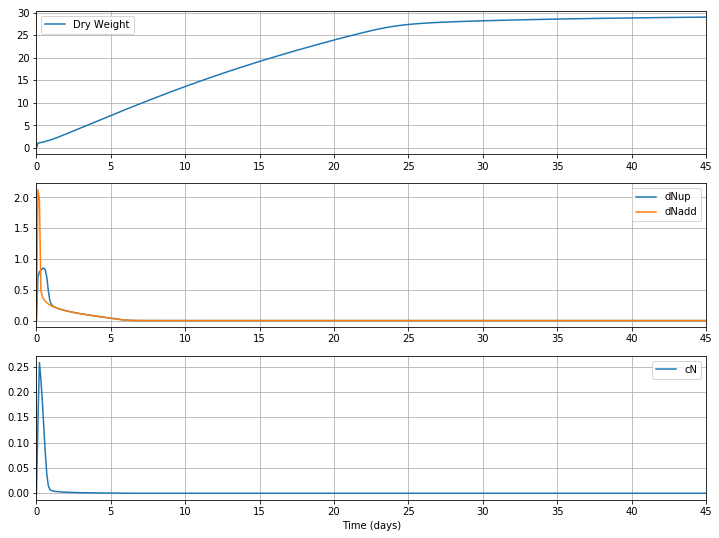

In [6]:
%matplotlib inline
plt.figure(figsize=(12,9))
ax = plt.subplot(311)
plt.plot(m.time, a.w, label='Dry Weight')
plt.grid()
plt.legend()

plt.subplot(312, sharex=ax)
plt.plot(m.time, a.dNup, label='dNup')
plt.plot(m.time, a.dNadd, label='dNadd')
plt.grid()
plt.legend()

plt.subplot(313, sharex=ax)
plt.plot(m.time, a.cN, label='cN')
plt.grid()
plt.legend()


plt.xlim(0, tf)
plt.xlabel('Time (days)')

In [ ]:
print(dNadd.value)